<h1> 1.7 - Smoothing and Blurring - With examples</h1>

The goal here is to use a low-pass filter to reduce the amount of noise and detail in an image.

Practically, this means that each pixel in the image is mixed in with its surrounding pixel intensities. This “mixture” of pixels in a neighborhood becomes our blurred pixel.

While this effect is usually unwanted in our photographs, it’s actually quite helpful when performing image processing tasks. In fact, smoothing and blurring is one of the most common pre-processing steps in computer vision and image processing.

For example, we can see that blurring is applied when building a mobile document scanner on the PyImageSearch blog. We also apply smoothing to aid us in finding our marker when measuring the distance from an object to our camera. In both these examples the smaller details in the image are smoothed out and we are left with more of the structural aspects of the image.

As we’ll see through this course, many image processing and computer vision functions, such as thresholding and edge detection, perform better if the image is first smoothed or blurred.


Smoothing and Blurring is one of the most important pre-processing steps in all of computer vision and image processing. By smoothing an image prior to applying techniques such as edge detection or thresholding we are able to reduce the amount of high frequency content, such as noise and edges (i.e. the “detail” of an image).

While this may sound counter-intuitive, by reducing the detail in an image we can more easily find objects that we are interested in.

Furthermore, this allows us to focus on the larger structural objects in the image.


# Required Setup

In [1]:
# import the necessary packages
import cv2
from matplotlib import pyplot as plt

# load the image, display it, and initialize the list of kernel sizes
image = cv2.imread('florida_trip.png')


# Averaging

It takes an area of pixels surrounding a central pixel, averages all these pixels together, and replaces the central pixel with the average.

This allows us to reduce noise and the level of detail, simply by relying on the average.

To accomplish our average blur, we’ll actually be convolving our image with a $M \times N$ normalized filter where both $M$ and $N$ are both odd integers.

Let’s go ahead and define a $3 \times 3$ average kernel that can be used to blur the central pixel with a 3 pixel radius:

$K = \frac{1}{9} \begin{bmatrix}1 & 1 & 1 \\  1 & 1 & 1 \\  1 & 1 & 1\end{bmatrix}$

Notice how each entry of the kernel matrix is uniformly weighted — we are giving equal weight to all pixels in the kernel. An alternative is to give pixels different weights, where pixels farther from the central pixel contribute less to the average; we’ll discuss this method of smoothing in the Gaussian blurring section of this lesson.

We could also define a $5 \times 5$ average kernel:

$K = \frac{1}{25} \begin{bmatrix}1 & 1 & 1 & 1 & 1 \\  1 & 1 & 1 & 1 & 1 \\  1 & 1 & 1 & 1 & 1 \\  1 & 1 & 1 & 1 & 1 \\  1 & 1 & 1 & 1 & 1\end{bmatrix}$

The larger the kernel the stronger the effect.



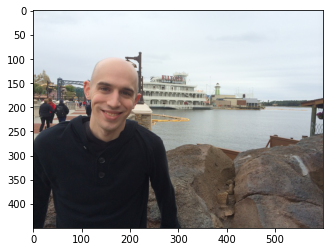

In [2]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

kernelSizes = [(9, 9), (15, 15)]

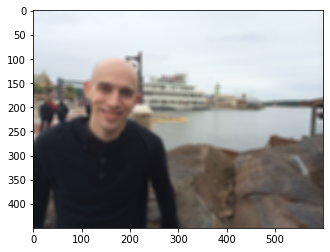

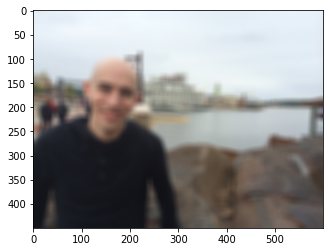

In [3]:
# loop over the kernel sizes and apply an "average" blur to the image
for (kX, kY) in kernelSizes:
	blurred = cv2.blur(image, (kX, kY))
	plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
	plt.show()

As the size of your kernel increases, your image will become progressively more blurred. This could easily lead to a point where you lose the edges of important structural objects in the image. Choosing the right amount of smoothing is critical when developing your own computer vision applications.

While average smoothing was quite simple to understand, it also weights each pixel inside the kernel area equally — and by doing this it becomes easy to over-blur our image and miss out on important edges. We can remedy this problem by applying Gaussian blurring.


# Gaussian

Next up, we are going to review Gaussian blurring. Gaussian blurring is similar to average blurring, but instead of using a simple mean, we are now using a weighted mean, where neighborhood pixels that are closer to the central pixel contribute more “weight” to the average. And as the name suggests, Gaussian smoothing is used to remove noise that approximately follows a Gaussian distribution.

The end result is that our image is less blurred, but more naturally blurred, than using the average method discussed in the previous section. Furthermore, based on this weighting we’ll be able to preserve more of the edges in our image as compared to average smoothing.

Just like an average blurring, Gaussian smoothing also uses a kernel of $M \times N$, where both M and N are odd integers.

However, since we are weighting pixels based on how far they are from the central pixel, we need an equation to construct our kernel. The equation for a Gaussian function in one direction is:

$G(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{x^{2}}{2\sigma^{2}}}$

And it then becomes trivial to extend this equation to two directions, one for the x-axis and the other for the y-axis, respectively:

$G(x, y) = \frac{1}{2\pi\sigma}e^{-\frac{x^{2} + y^{2}}{2\sigma^{2}}}$

where x and y are the respective distances to the horizontal and vertical center of the kernel and $\sigma$ is the standard deviation of the Gaussian kernel.

Again, as we’ll see in the code below, when the size of our kernel increases so will the amount of blurring that is applied to our output image. However, the blurring will appear to be more “natural” and will preserve edges in our image better than simple average smoothing:



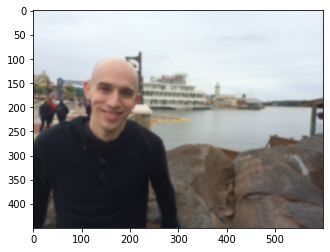

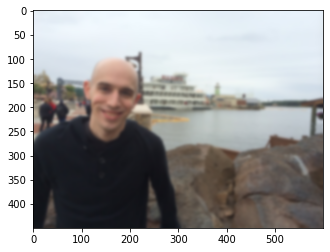

In [4]:
# loop over the kernel sizes and apply a "Gaussian" blur to the image
for (kX, kY) in kernelSizes:
	blurred = cv2.GaussianBlur(image, (kX, kY), 0)
	plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
	plt.show()

The last parameter is our $\sigma$, the standard deviation of the Gaussian distribution. By setting this value to 0, we are instructing OpenCV to automatically compute $\sigma$ based on our kernel size. In most cases, you’ll want to let your $\sigma$ be computed for you. But in the case you want to supply $\sigma$ for yourself, I would suggest reading through the OpenCV documentation on cv2.GaussianBlur  to make sure you understand the implications.

# Median

Traditionally, it has been most effective when removing salt-and-pepper noise.

When applying a median blur the kernel size must be square. Furthermore (unlike the averaging method), instead of replacing the central pixel with the average of the neighborhood, we instead replace the central pixel with the median of the neighborhood.

The reason median blurring is more effective at removing salt-and-pepper style noise from an image is that each central pixel is always replaced with a pixel intensity that **exists** in the image. And since the median is robust to outliers, the salt-and-pepper noise will be less influential to the median than another statistical method, such as the average.

Again, methods such as averaging and Gaussian compute means or weighted means for the neighborhood — this average pixel intensity may or may not be present in the neighborhood. But by definition, the median pixel must exist in our neighborhood. By replacing our central pixel with a median rather than an average, we can substantially reduce noise.



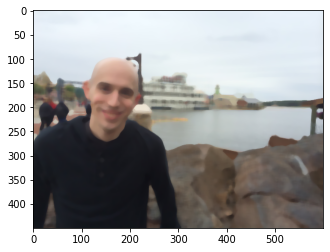

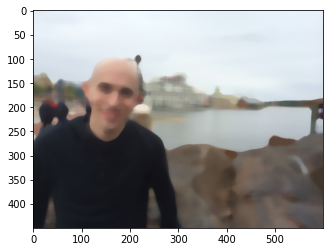

In [5]:
# loop over the kernel sizes and apply a "Median" blur to the image
for k in ( 9, 15):
	blurred = cv2.medianBlur(image, k)
	plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
	plt.show()

Notice that we are no longer creating a “motion blur” effect like in averaging and Gaussian blurring — instead, we are removing substantially more detail and noise.

For example, take a look at the color of the rocks to the right of myself in the image. As our kernel size increases, detail and color on the rocks become substantially less pronounced. By the time we are using a $15\times15$ kernel the rocks have lost almost all detail and look like a big “blob”.

For damaged images or photos captured under highly sub-optimal conditions, a median blur can really help as a pre-processing step prior to passing the image along to other methods, such as thresholding and edge detection.


# Bilateral
The last method we are going to explore is bilateral blurring.

Thus far we have tended to lose edges in the image as side effect.

Bilateral blurring accomplishes smothin/blurring without loosing edges by introducing two Gaussian distributions.

The first Gaussian function only considers spatial neighbors. That is, pixels that appear close together in the (x, y)-coordinate space of the image. The second Gaussian then models the pixel intensity of the neighborhood, ensuring that only pixels with similar intensity are included in the actual computation of the blur.

Intuitively, this makes sense. If pixels in the same (small) neighborhood have a similar pixel value, then they likely represent the same object. But if two pixels in the same neighborhood have contrasting values, then we could be examining the edge or boundary of an object — and we would like to preserve this edge.

The largest downside to this method is that it is considerably slower than its averaging, Gaussian, and median blurring counterparts.



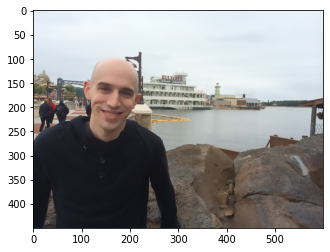

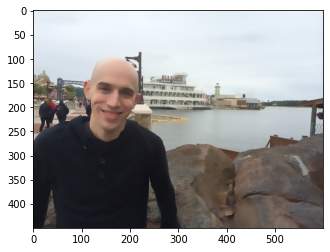

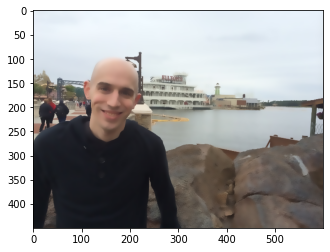

In [6]:
# construct the list of bilateral
# filtering parameters that we are going to explore

params = [(11, 21, 7), (11, 41, 21), (11, 61, 39)]

# loop over the diameter, sigma color, and sigma space
for (diameter, sigmaColor, sigmaSpace) in params:
	# apply bilateral filtering and display the image
	blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)
	plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
	plt.show()

These parameters correspond to the diameter, $\sigma_{color}$, and $\sigma_{space}$ of the bilateral filter, respectively:

* Diameter of our pixel neighborhood [ $d$ ]. The larger this is, the more pixels will be included in the blurring computation. 

* Color standard deviation [ $\sigma_{color}$ ]. A larger value means that more colors in the neighborhood will be considered when computing the blur. If $\sigma_{color} >> d$ , then we essentially have broken the assumption that only pixels of similar color should contribute significantly to the blur.

* Space standard deviation [ $\sigma_{space}$ ]. A larger value means that pixels farther out from the central pixel diameter will influence the blurring.

On the 1st image we start off with a diameter of $d=11$ pixels, $\sigma_{color}=21$, and $\sigma_{space}=7$. The effects of our blurring are not fully apparent yet, but if you zoom in on the rocks and compare them to our original image, you’ll notice that much of the texture has disappeared! The rocks appear much smoother, as if they have been eroded and smoothed over years and years of rushing water. However, the edges and boundaries between the lake and the rocks is clearly maintained.

Next, on the 2nd, we have increased both $\sigma_{color}$ and $\sigma_{space}$ jointly. At this point we can really see the effects of bilateral filtering. The buttons on my black hoodie have practically disappeared and nearly all detail and wrinkles on my skin have been removed. 

On the 3rd one, we increased again $\sigma_{color}$ and $\sigma_{space}$ just to demonstrate how powerful of a technique bilateral filtering is. Now nearly all detail and texture from the rocks, water, sky, and my skin and hoodie are gone. It’s also starting to look as if the number of colors in the image have been reduced. 

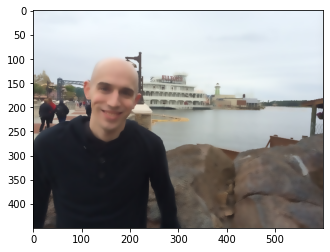

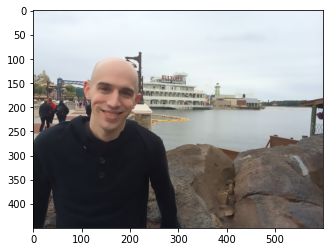

In [7]:
# construct the list of bilateral
# filtering parameters that we are going to explore

params = [ (11, 80, 20), (11, 20, 120)]

# loop over the diameter, sigma color, and sigma space
for (diameter, sigmaColor, sigmaSpace) in params:
	# apply bilateral filtering and display the image
	blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)
	plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
	plt.show()

# Summary

We then reviewed the four primary methods to smooth an image in OpenCV: 

* **Averaging**: fast, but may not preserve edges.

* **Gaussian blurring**: better at preserving edges, but slightly slower

* **Median filtering**: used to reduce salt-and-pepper style noise as the median statistic is much more robust and less sensitive to outliers than other statistical methods such as the mean 

* **Bilateral filtering**:  preserves edges, but is substantially slower than the other methods. Bilateral filtering also boasts the most parameters to tune which can become a nuisance to tune correctly.